# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df['User ID'].nunique()

400

In [5]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [6]:
df['Gender'].replace({'Male':0,'Female':1},inplace = True)

In [7]:
df.drop('User ID',axis = 1, inplace = True)

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [9]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<AxesSubplot:>

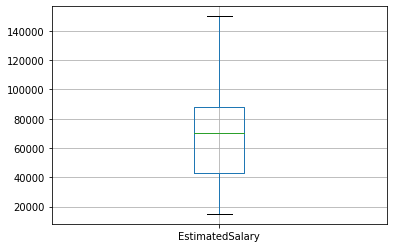

In [10]:
df[['EstimatedSalary']].boxplot()

<AxesSubplot:>

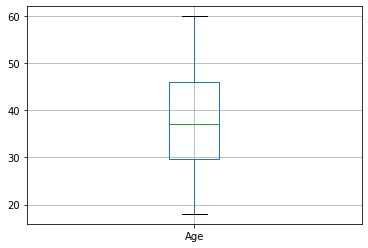

In [11]:
df[['Age']].boxplot()

In [12]:
x = df.drop('Purchased',axis = 1)
y = df['Purchased']
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

In [14]:
x_train

,Gender,Age,EstimatedSalary
286,1,37,62000
47,1,27,54000
87,1,28,85000
195,0,34,43000
328,0,36,118000
...,...,...,...
127,0,26,32000
266,0,40,75000
69,1,31,68000
186,1,20,82000


# Train Model

In [15]:
rf_clf = RandomForestClassifier(random_state=10 )
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [16]:
rf_clf.n_features_in_

3

In [17]:
# Feature selection in Random Forest
feature_array = rf_clf.feature_importances_

<AxesSubplot:>

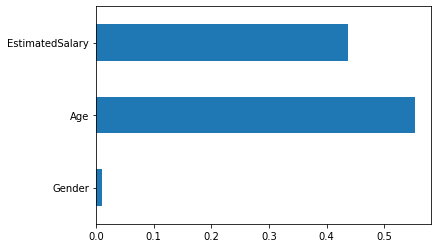

In [18]:
s1 = pd.Series(feature_array)
s1.index = x.columns
s1.plot(kind = 'barh')

<AxesSubplot:>

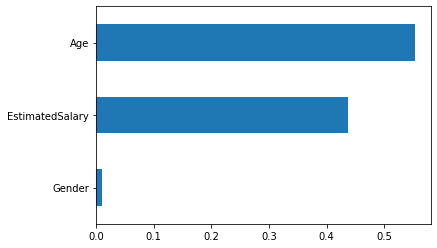

In [19]:
s1 = pd.Series(feature_array)
s1.index = x.columns
s1.sort_values().plot(kind = 'barh')

In [20]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

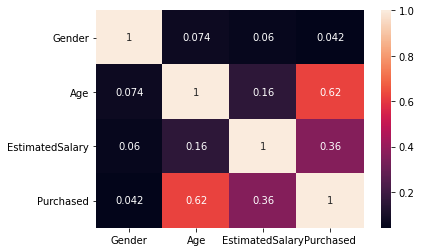

In [21]:
sns.heatmap(df.corr(),annot = True)

# Evaluation

In [22]:
# Testing Data Accuracy
y_pred = rf_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing data accuracy :",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

confusion_matrix(y_test, y_pred)

Testing data accuracy : 0.8916666666666667
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        77
           1       0.86      0.84      0.85        43

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



array([[71,  6],
       [ 7, 36]], dtype=int64)

In [23]:
# Training Data Accuracy

y_pred_train = rf_clf.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print("Testing data accuracy :",test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

confusion_matrix(y_train, y_pred_train)

Testing data accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       100

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



array([[180,   0],
       [  0, 100]], dtype=int64)

### Decision Tree Classifier

In [24]:
dt_clf = DecisionTreeClassifier(random_state=10 )
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [25]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing data accuracy :",test_accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

confusion_matrix(y_test, y_pred)

Testing data accuracy : 0.8666666666666667
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        77
           1       0.81      0.81      0.81        43

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



array([[69,  8],
       [ 8, 35]], dtype=int64)

In [26]:
# Training Data Accuracy

y_pred_train = dt_clf.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print("Testing data accuracy :",test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

confusion_matrix(y_train, y_pred_train)

Testing data accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       100

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



array([[180,   0],
       [  0, 100]], dtype=int64)

# Hyperparameter Tuning

In [86]:
hyp =   { 'n_estimators' : np.arange(10,400), # number of DT
        'criterion' : ['gini','entroy'],
        'max_depth' : np.arange(2, 20),
        'min_samples_split' : np.arange(2,100),
        'min_samples_leaf' : np.arange(1,100),
        'max_features':np.arange(1,4)}

# {"auto", "sqrt", "log2"}, int or float, default="auto"
#     The number of features to consider when looking for the best split:

#     - If int, then consider `max_features` features at each split.
#     - If float, then `max_features` is a fraction and
#       `round(max_features * n_features)` features are considered at each
#       split.
#     - If "auto", then `max_features=sqrt(n_features)`.
#     - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
#     - If "log2", then `max_features=log2(n_features)`.
#     - If None, then `max_features=n_features`.

In [27]:
hyp =   { 'n_estimators' : np.arange(10,13), # number of DT
        'criterion' : ['gini','entroy'],
        'max_depth' : np.arange(4, 10),
        'min_samples_split' : np.arange(2,20),
        'min_samples_leaf' : np.arange(2,10),
        'max_features':['auto']}

# {"auto", "sqrt", "log2"}, int or float, default="auto"
#     The number of features to consider when looking for the best split:

#     - If int, then consider `max_features` features at each split.
#     - If float, then `max_features` is a fraction and
#       `round(max_features * n_features)` features are considered at each
#       split.
#     - If "auto", then `max_features=sqrt(n_features)`.
#     - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
#     - If "log2", then `max_features=log2(n_features)`.
#     - If None, then `max_features=n_features`.

In [ ]:
rf_model = RandomForestClassifier(random_state=12)
gscv_rf_model = GridSearchCV(rf_model,hyp,cv = 10)
gscv_rf_model.fit(x_train,y_train)

# Random Forest Regressor

In [32]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [33]:
x = df.drop('EstimatedSalary',axis = 1)
y = df['EstimatedSalary']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [35]:
rf_reg = RandomForestRegressor(random_state= 20)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=20)

In [41]:
# Testing Data Evaluation
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print('R squared value is :',r2_value)

MSE : 1366581336.8053548
RMSE : 36967.3009131767
MAE : 29398.996002156742
R squared value is : -0.21792368612747892


In [37]:
y_test[5:10]

342     65000
197     36000
291     89000
29      18000
284    141000
Name: EstimatedSalary, dtype: int64

In [38]:
y_pred[5:10]

array([62088.06349206, 48359.66666667, 32503.5       , 67923.96031746,
       60118.08333333])

In [42]:
# Training Data Evaluation
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print('R squared value is :',r2_value)

MSE : 479425148.7182404
RMSE : 21895.779244371286
MAE : 17649.792741381458
R squared value is : 0.5917218230137655


## Hyperparameter Tuning for Regression

In [ ]:
hyp =   { 'n_estimators' : np.arange(10,13), # number of DT
        'criterion' : ['mse','mae'],
        'max_depth' : np.arange(4, 10),
        'min_samples_split' : np.arange(2,20),
        'min_samples_leaf' : np.arange(2,10),
        'max_features':['auto']}


In [ ]:
rf_model = RandomForestRegressor(random_state=12)
gscv_rf_model = GridSearchCV(rf_model,hyp,cv = 10)
gscv_rf_model.fit(x_train,y_train)

In [ ]:
rf_model = RandomForestRegressor(random_state=12)
rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv = 10)
rscv_rf_model.fit(x_train,y_train)